In [46]:
from keras.datasets import mnist

(train_images, train_labels),(test_images,test_labels) = mnist.load_data()

In [47]:
import keras
keras.__version__

'2.4.3'

In [48]:
train_images.shape

(60000, 28, 28)

In [49]:
my_slice = train_images[10:20, 0:14, 0:14]

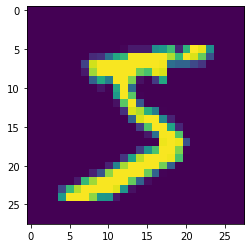

In [50]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0])
plt.show()

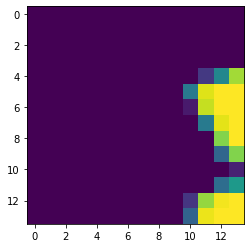

In [51]:
plt.imshow(my_slice[0])
plt.show()

In [52]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [53]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [54]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [55]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [56]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 9ms/step - loss: 0.2584 - accuracy: 0.9251
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1052 - accuracy: 0.9690
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0692 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0507 - accuracy: 0.9852
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0388 - accuracy: 0.9886


In [57]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0720 - accuracy: 0.9783


In [58]:
print('test_acc:', test_acc)

test_acc: 0.9782999753952026


In [59]:
#テンソルとは箱、コンテナのこと

In [60]:
import numpy as np

x = np.array([1,2,3])
x

array([1, 2, 3])

In [61]:
x.ndim

1

In [62]:
# テンソルの次元の事を時に軸(axis)という。軸の数を階数(rank)という。
# x はrankが1のテンソルであり、その一つのテンソルは3次元ベクトルである

# 引き出しの数がテンソルで、中に入っているのは大体数字、ベクトル、行列、スカラである



In [63]:
x = np.array([[1,2,3],
             [4,5,6]])
x.ndim

2

In [64]:
# 2つの軸を持つので2次元テンソル

In [65]:
train_images.shape

(60000, 784)

In [ ]:
theanoとtensorで色チャネルがテンソルの何軸目に設定されるかの規格がことなる
tensorは最後theanoは最初

動画データ、4fpsでの録画の場合、1分で240フレームのデータに分けられる
float32として32bitで保存する
144*256のカラー動画だった場合、
(240,144,256,3)
これを1バッチ4つ(4分分)取り出すなら
4*240*144*256*3 = 106168320個の値が32bitなので

In [72]:
bite = 106168320*32/8
bite / 1000000

424.67328

In [ ]:
約400MB

In [ ]:
sequential()から構築していく方法は、一般的な使用用途は網羅している
関数型APIとして、任意のアーキテクチャを構築することができる。
kerasの機能を自分好みに作り上げる場合には便利

In [74]:
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)

In [75]:
model = models.Model(inputs=input_tensor, outputs=output_tensor)

In [76]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='mse',metrics=['accuracy'])

In [78]:
model.fit(train_images, train_labels, batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0200 - accuracy: 0.8760
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0110 - accuracy: 0.9300
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0093 - accuracy: 0.9411
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0082 - accuracy: 0.9481
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0075 - accuracy: 0.9530
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0069 - accuracy: 0.9568
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0064 - accuracy: 0.9597
Epoch 8/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0060 - accuracy: 0.9629
Epoch 9/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0056 - accuracy: 0.9651
Epoch 10/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0053 - accuracy: 0.9675

In [ ]:
映画レビューのデータベースから。
25000ずつがtrain,testに入っている

ネガポジ同じ割合

予測したい場合には、全データを使ってはいけない
trainingでうまく動くからといってみたことないデータでうまく動くとは言えないからだ。

このデータセットは特定の単語を辞書型に直したもの。

In [79]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [ ]:
num_words = 10000は、出現頻度の高い順で10000の単語だけを残しておく、という指定

In [81]:
import pandas as pd

pd.DataFrame(train_data)

,0
0,"[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ..."
1,"[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,..."
2,"[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5..."
3,"[1, 4, 2, 2, 33, 2804, 4, 2040, 432, 111, 153,..."
4,"[1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1..."
...,...
24995,"[1, 14, 9, 6, 2758, 20, 21, 1517, 7, 2078, 5, ..."
24996,"[1, 4679, 2784, 299, 6, 1042, 37, 80, 81, 233,..."
24997,"[1, 11, 6, 230, 245, 6401, 9, 6, 1225, 446, 2,..."
24998,"[1, 1446, 7079, 69, 72, 3305, 13, 610, 930, 8,..."


In [ ]:
インデックスを使ってもとの単語に戻す

In [82]:

word_index = imdb.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


In [83]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [ ]:
one hotを使うことで、入力の長さが統一化される
次元は増えるが、dense層に直接入力できる


In [ ]:
ラベルもone hotにしておく

In [84]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [85]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [86]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
コンパイルもいろんな方法がある

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
metricsを変更する場合

In [87]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [88]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [89]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 46ms/step - loss: 0.5538 - binary_accuracy: 0.7425 - val_loss: 0.4153 - val_binary_accuracy: 0.8689
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3297 - binary_accuracy: 0.8986 - val_loss: 0.3282 - val_binary_accuracy: 0.8774
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2391 - binary_accuracy: 0.9214 - val_loss: 0.2830 - val_binary_accuracy: 0.8900
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1841 - binary_accuracy: 0.9409 - val_loss: 0.2744 - val_binary_accuracy: 0.8914
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1498 - binary_accuracy: 0.9521 - val_loss: 0.2818 - val_binary_accuracy: 0.8868
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1192 - binary_accuracy: 0.9634 - val_loss: 0.2970 - val_binary_accuracy: 0.8829
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - los

In [90]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

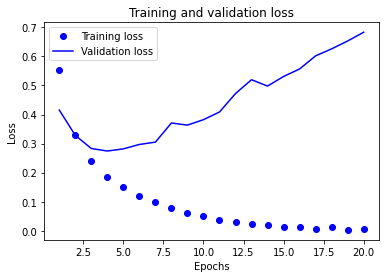

In [94]:


import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



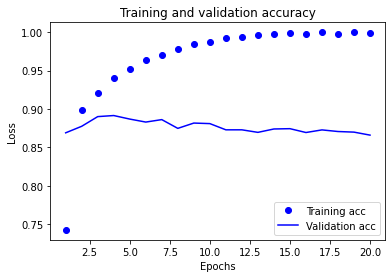

In [95]:
plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [96]:


model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)



Epoch 1/4
49/49 [==============================] - 1s 26ms/step - loss: 0.5723 - accuracy: 0.6934
Epoch 2/4
49/49 [==============================] - 1s 26ms/step - loss: 0.4016 - accuracy: 0.8906
Epoch 3/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2444 - accuracy: 0.9252
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.3335 - accuracy: 0.8722


In [97]:
results

[0.33347663283348083, 0.8722400069236755]

In [ ]:
model.predict(x_test)

In [ ]:
ニュース記事のトピックのデータセット
記事から記事の所属するカテゴリをあてる

In [98]:


from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)



2113536/2110848 [==============================] - 0s 0us/step


In [99]:


word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])



557056/550378 [==============================] - 0s 0us/step


In [100]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [ ]:
onehot別名カテゴリエンコードをおこなう

In [101]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [102]:


def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)



In [ ]:
上記はkerasでは非常に簡単な関数で実装されている

In [103]:


from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)



In [104]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
出力層は46次元である
トピックの分類なので、各クラスに所属する割合が得られる必要がある

出力は、　46種類の出力クラスの確率分布　である(46個の確率分布ってことよな？)

In [105]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [106]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [107]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 59ms/step - loss: 2.6100 - accuracy: 0.5416 - val_loss: 1.7570 - val_accuracy: 0.6510
Epoch 2/20
16/16 [==============================] - 1s 60ms/step - loss: 1.4421 - accuracy: 0.7072 - val_loss: 1.3246 - val_accuracy: 0.7020
Epoch 3/20
16/16 [==============================] - 1s 60ms/step - loss: 1.0802 - accuracy: 0.7656 - val_loss: 1.1548 - val_accuracy: 0.7520
Epoch 4/20
16/16 [==============================] - 1s 60ms/step - loss: 0.8551 - accuracy: 0.8165 - val_loss: 1.0467 - val_accuracy: 0.7740
Epoch 5/20
16/16 [==============================] - 1s 60ms/step - loss: 0.6853 - accuracy: 0.8553 - val_loss: 0.9710 - val_accuracy: 0.8010
Epoch 6/20
16/16 [==============================] - 1s 60ms/step - loss: 0.5505 - accuracy: 0.8844 - val_loss: 0.9416 - val_accuracy: 0.8070
Epoch 7/20
16/16 [==============================] - 1s 60ms/step - loss: 0.4443 - accuracy: 0.9079 - val_loss: 0.9039 - val_accuracy: 0.8130
Epoch 8/20
16

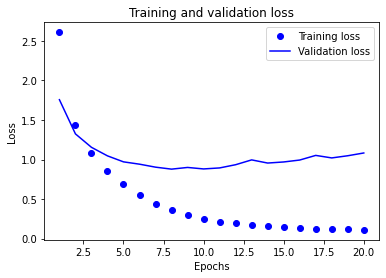

In [108]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

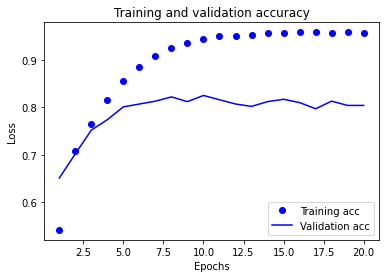

In [110]:
plt.clf()   # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [111]:


model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)



Epoch 1/8
16/16 [==============================] - 1s 66ms/step - loss: 2.6822 - accuracy: 0.5318 - val_loss: 1.7871 - val_accuracy: 0.6230
Epoch 2/8
16/16 [==============================] - 1s 56ms/step - loss: 1.4672 - accuracy: 0.6987 - val_loss: 1.3426 - val_accuracy: 0.7050
Epoch 3/8
16/16 [==============================] - 1s 55ms/step - loss: 1.0744 - accuracy: 0.7726 - val_loss: 1.1513 - val_accuracy: 0.7470
Epoch 4/8
16/16 [==============================] - 1s 55ms/step - loss: 0.8411 - accuracy: 0.8224 - val_loss: 1.0537 - val_accuracy: 0.7700
Epoch 5/8
16/16 [==============================] - 1s 56ms/step - loss: 0.6712 - accuracy: 0.8608 - val_loss: 0.9858 - val_accuracy: 0.7990
Epoch 6/8
16/16 [==============================] - 1s 55ms/step - loss: 0.5365 - accuracy: 0.8887 - val_loss: 0.9361 - val_accuracy: 0.8130
Epoch 7/8
16/16 [==============================] - 1s 56ms/step - loss: 0.4308 - accuracy: 0.9102 - val_loss: 0.9189 - val_accuracy: 0.8080
Epoch 8/8
71/71 [===

In [112]:
results

[0.9832457304000854, 0.7889581322669983]

In [ ]:
適当な出力を行うモデルをベースラインとすると、19%の正答率なので、ベースラインよりは良いことが分かる

In [113]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.1856634016028495

In [ ]:
テストセットを予測

In [114]:
predictions = model.predict(x_test)

In [115]:
np.sum(predictions[0])

1.0000001

In [ ]:
softmaxによって合計1となる46個の値が得られた

中でも最も値の大きかったものが所属クラスである

In [116]:
np.argmax(predictions[0])

3

In [ ]:
中間層にボトルネックを持たせた場合、予測はどうなるのか？？の確認


In [117]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [118]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [119]:


model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))



Epoch 1/20
63/63 [==============================] - 1s 18ms/step - loss: 2.9009 - accuracy: 0.4322 - val_loss: 2.0588 - val_accuracy: 0.5870
Epoch 2/20
63/63 [==============================] - 1s 17ms/step - loss: 1.6720 - accuracy: 0.6214 - val_loss: 1.5158 - val_accuracy: 0.6520
Epoch 3/20
63/63 [==============================] - 1s 18ms/step - loss: 1.2954 - accuracy: 0.7082 - val_loss: 1.3714 - val_accuracy: 0.6900
Epoch 4/20
63/63 [==============================] - 1s 17ms/step - loss: 1.1191 - accuracy: 0.7375 - val_loss: 1.3137 - val_accuracy: 0.7020
Epoch 5/20
63/63 [==============================] - 1s 17ms/step - loss: 1.0017 - accuracy: 0.7521 - val_loss: 1.3035 - val_accuracy: 0.7000
Epoch 6/20
63/63 [==============================] - 1s 17ms/step - loss: 0.9152 - accuracy: 0.7652 - val_loss: 1.2884 - val_accuracy: 0.7120
Epoch 7/20
63/63 [==============================] - 1s 17ms/step - loss: 0.8394 - accuracy: 0.7794 - val_loss: 1.3020 - val_accuracy: 0.7050
Epoch 8/20
63

In [ ]:
正答率は70%程度で止まる

In [ ]:
46クラスの情報を出力するためには4ユニットでは情報が欠損しすぎていることを表している

In [ ]:
回帰を行うモデルの例としてボストンの家の値段予測してみる

In [120]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [121]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [122]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [ ]:
k-foldもここでやってみる


In [123]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)

    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()

    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)

    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [ ]:
検証データの分割方法によっては、検証スコアのバリアンスが高くなる
データが少ないとき、バリアンスに割けるデータ数がすくなくなり、よりその傾向は強くなる
また、検証データが一つで固定である場合に、正しくモデルが訓練できなくなる

In [ ]:
trainをk個のサブセットに分け、順に検証データを当番してもらう

In [124]:
all_scores

[2.1679463386535645, 2.319770336151123, 2.7065579891204834, 2.615673303604126]

In [ ]:
あるサブセットを検証データとして、採用し、残りのサブセットでモデルを学習させる
学習は100エポックをつかう


最終モデルの評価値を残しておく(valをカンニングしながら学習した結果のvalの評価値)

k=4なのでこの結果が4つ帰ってくる。

ここで学習したモデルの潜在的に持っている予測パワーはこれらの値を平均してやったものと考えるのが妥当だろう

In [ ]:
ここで、モデルの1epochごとの結果の平均値を記録していき、その推移を確認することとする

In [127]:
from keras import backend as K

K.clear_session()

In [131]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)

    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()

    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [132]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

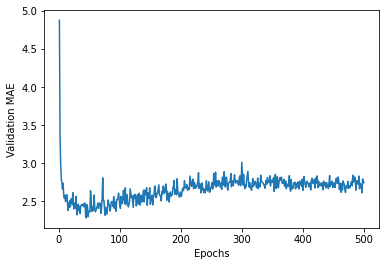

In [133]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [129]:
スケーリングやジグザグがあってこの図は読み取りにくい

スケールを見やすくするため、最初の数個は取り除く。
ジグザグは移動平均にして見やすくする

SyntaxError: ignored

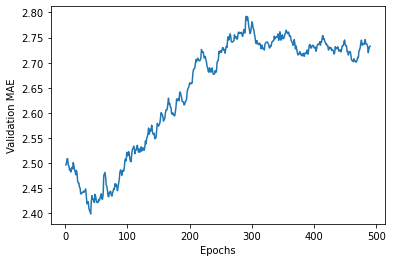

In [134]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [135]:
# Get a fresh, compiled model.
model = build_model()
# Train it on the entirety of the data.
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 17.7986 - mae: 2.6398


In [136]:
test_mae_score

2.6398189067840576

In [ ]:
全く同じデータが訓練と検証データに分かれて入っていてはいけない
少なくとも、訓練側に同じデータが入っているのはアリ。

それが母集団のサンプリングを示している場合もあるのだから。


時間はランダムにしてはいけないよね



目的の分布を表すサンプリングでなければならない。
手書き文字の予測に0~7だけ学習させても8,9が予測できなくなるのと同じ。
trainをわざと不均衡データにしているようなもの。不均衡データの予測ってただでさえ難しいのに。


数値の場合分布を表すように分割させる方法がある。
四分位に分割して、その数字の割合で分けるような方法をとる。



In [ ]:
正則化することを考える

層を浅くしたり、正則化したりして、
過学習と学習不足のトレードオフを考える

In [137]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [138]:


from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])



In [139]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [140]:


original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))



Epoch 1/20
49/49 [==============================] - 3s 52ms/step - loss: 0.4483 - acc: 0.8284 - val_loss: 0.3331 - val_acc: 0.8826
Epoch 2/20
49/49 [==============================] - 2s 35ms/step - loss: 0.2578 - acc: 0.9090 - val_loss: 0.2818 - val_acc: 0.8892
Epoch 3/20
49/49 [==============================] - 2s 34ms/step - loss: 0.1949 - acc: 0.9306 - val_loss: 0.2892 - val_acc: 0.8838
Epoch 4/20
49/49 [==============================] - 2s 34ms/step - loss: 0.1640 - acc: 0.9414 - val_loss: 0.2964 - val_acc: 0.8829
Epoch 5/20
49/49 [==============================] - 2s 35ms/step - loss: 0.1428 - acc: 0.9497 - val_loss: 0.3154 - val_acc: 0.8790
Epoch 6/20
49/49 [==============================] - 2s 35ms/step - loss: 0.1233 - acc: 0.9580 - val_loss: 0.3518 - val_acc: 0.8726
Epoch 7/20
49/49 [==============================] - 2s 35ms/step - loss: 0.1091 - acc: 0.9632 - val_loss: 0.3608 - val_acc: 0.8711
Epoch 8/20
49/49 [==============================] - 2s 35ms/step - loss: 0.0965 - a

In [141]:


smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))



Epoch 1/20
49/49 [==============================] - 2s 40ms/step - loss: 0.5832 - acc: 0.7088 - val_loss: 0.5274 - val_acc: 0.8328
Epoch 2/20
49/49 [==============================] - 2s 32ms/step - loss: 0.4733 - acc: 0.8578 - val_loss: 0.4751 - val_acc: 0.8418
Epoch 3/20
49/49 [==============================] - 2s 31ms/step - loss: 0.4163 - acc: 0.9016 - val_loss: 0.4429 - val_acc: 0.8767
Epoch 4/20
49/49 [==============================] - 2s 32ms/step - loss: 0.3744 - acc: 0.9252 - val_loss: 0.4237 - val_acc: 0.8810
Epoch 5/20
49/49 [==============================] - 2s 32ms/step - loss: 0.3389 - acc: 0.9387 - val_loss: 0.4154 - val_acc: 0.8775
Epoch 6/20
49/49 [==============================] - 2s 32ms/step - loss: 0.3083 - acc: 0.9481 - val_loss: 0.4086 - val_acc: 0.8768
Epoch 7/20
49/49 [==============================] - 2s 32ms/step - loss: 0.2791 - acc: 0.9560 - val_loss: 0.4010 - val_acc: 0.8779
Epoch 8/20
49/49 [==============================] - 2s 32ms/step - loss: 0.2528 - a

In [142]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

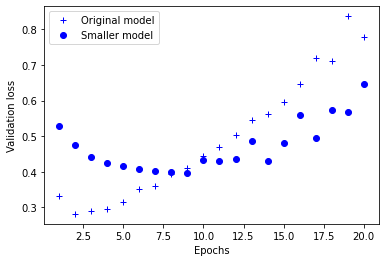

In [143]:
import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [144]:


bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])



In [145]:


bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))



Epoch 1/20
49/49 [==============================] - 17s 355ms/step - loss: 0.4655 - acc: 0.7946 - val_loss: 0.2991 - val_acc: 0.8741
Epoch 2/20
49/49 [==============================] - 16s 318ms/step - loss: 0.2220 - acc: 0.9130 - val_loss: 0.3397 - val_acc: 0.8506
Epoch 3/20
49/49 [==============================] - 16s 318ms/step - loss: 0.1293 - acc: 0.9531 - val_loss: 0.5252 - val_acc: 0.8098
Epoch 4/20
49/49 [==============================] - 16s 319ms/step - loss: 0.0597 - acc: 0.9815 - val_loss: 0.4828 - val_acc: 0.8707
Epoch 5/20
49/49 [==============================] - 16s 317ms/step - loss: 0.0829 - acc: 0.9856 - val_loss: 0.5117 - val_acc: 0.8798
Epoch 6/20
49/49 [==============================] - 16s 319ms/step - loss: 0.0024 - acc: 0.9996 - val_loss: 0.7044 - val_acc: 0.8792
Epoch 7/20
49/49 [==============================] - 16s 318ms/step - loss: 0.1211 - acc: 0.9884 - val_loss: 0.6283 - val_acc: 0.8766
Epoch 8/20
49/49 [==============================] - 16s 318ms/step - 

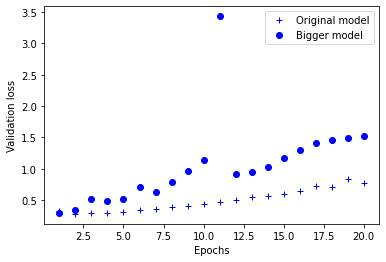

In [146]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

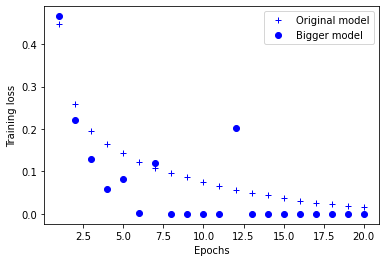

In [147]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

In [148]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [149]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [150]:


l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))



Epoch 1/20
49/49 [==============================] - 5s 111ms/step - loss: 0.4913 - acc: 0.8199 - val_loss: 0.3751 - val_acc: 0.8840
Epoch 2/20
49/49 [==============================] - 2s 39ms/step - loss: 0.3144 - acc: 0.9051 - val_loss: 0.3396 - val_acc: 0.8844
Epoch 3/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2697 - acc: 0.9192 - val_loss: 0.3286 - val_acc: 0.8892
Epoch 4/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2486 - acc: 0.9292 - val_loss: 0.3352 - val_acc: 0.8854
Epoch 5/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2377 - acc: 0.9333 - val_loss: 0.3477 - val_acc: 0.8802
Epoch 6/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2303 - acc: 0.9359 - val_loss: 0.4107 - val_acc: 0.8602
Epoch 7/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2247 - acc: 0.9381 - val_loss: 0.3565 - val_acc: 0.8796
Epoch 8/20
49/49 [==============================] - 2s 37ms/step - loss: 0.2180 - 

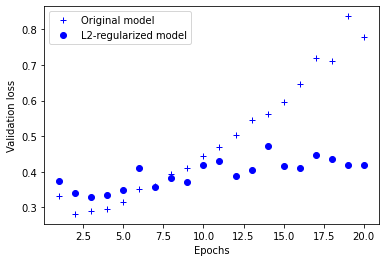

In [151]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [152]:
from keras import regularizers

# L1 regularization
regularizers.l1(0.001)

# L1 and L2 regularization at the same time
regularizers.l1_l2(l1=0.001, l2=0.001)

In [153]:


# At training time: we drop out 50% of the units in the output
#layer_output *= np.randint(0, high=2, size=layer_output.shape)



NameError: ignored

In [154]:
# At test time:
#layer_output *= 0.5

NameError: ignored

In [155]:


# At training time:
#layer_output *= np.randint(0, high=2, size=layer_output.shape)


# Note that we are scaling *up* rather scaling *down* in this case
#layer_output /= 0.5

NameError: ignored

In [156]:
#model.add(layers.Dropout(0.5))

In [157]:


dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])



In [ ]:
ｄｐｔdpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

In [ ]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [ ]:
ドロップアウトで過学習を抑える考えは銀行員の移動が多い話からきた
コンスピラシー


出力結果にノイズを乗せることで偶然の結果を排除できる？

In [ ]:
ランダム出力を超えるようなモデルを統計的検出力のあるモデルというらしい
statistical power

これが絶対に満たせるとはいえない。
xがyからくるものである。関係がある。
余分なxの変数が存在していない。
それを示せるだけのデータが用意されている
などを満たす場合には検出力のあるモデルが期待できる

In [ ]:
これらが満たされていても、なおチューニングすべきパラメタや、
損失関数の設定、
などが必要

In [ ]:
そして予測したい評価対象の設定。

これらがうまく行かない場合は設計段階に戻る

In [ ]:
検出力のあるモデルが得られたならば、次にモデルをよりフィットさせるように進化させる

学習不足に対してアプローチしつつ、汎化性も担保していく

In [ ]:
CNNの話


In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

In [ ]:
test_acc

In [ ]:
畳み込みは画像を周辺の情報を持ちながら小さいピクセルへ縮小していくようなもの
その際、どれだけの値に出力(縮小)するかを、重みによって調節していく。


また、最初、入力でチャネルだったものは、その後に層の数の変更などを加えられフィルターとしてはたらく。
フィルターの重みによって、次の層へどんな情報を伝えるかが変わる。

フィルタと入力の内積をとっていくことで、次元が削減されていく

今までフィルタの選び方は特徴量エンジニアリングの一つであったが、
フィルタ自体も学習するように設定できる

In [ ]:
https://www.kaggle.com/c/dogs-vs-cats/data

In [ ]:
import os, shutil

In [ ]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = '/Users/fchollet/Downloads/kaggle_original_data'

# The directory where we will
# store our smaller dataset
base_dir = '/Users/fchollet/Downloads/cats_and_dogs_small'
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

In [ ]:


from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])



In [ ]:


from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')



In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

In [ ]:
model.save('cats_and_dogs_small_1.h5')

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [153]:


datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')



In [ ]:
# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [ ]:


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])



In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

In [ ]:
model.save('cats_and_dogs_small_2.h5')

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
畳み込みネットの最終層を分類器だと考える

途中までのネットワークは特徴量抽出器だと考える。
この考えでは、最終層までのネットワークを「畳み込みベースモデル」と呼ぶ

VGG16のように有名で高精度なネットワークが世界では共有されている。
学習は大変なので、ネットワーク構造と重みを再利用する
重みは固定だったり再学習させたりする。
出力側の一部を再学習させるのが良くみられるパターン。このように全パラメタを元のネットワークのものをつかうのでなく、学習させなおすのを
ファインチューニングと呼ぶ

まずは一番簡単な方法としては最終層を自分で定義した分類器にするか、もしくは最終層だけ自分のタスクのために重みをすべて初期化して学習させる。
などの方法である。


In [ ]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [ ]:
conv_base.summary()

In [ ]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/Users/fchollet/Downloads/cats_and_dogs_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

In [ ]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [ ]:


from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))



In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
VGGを使ってファインチューニングしていくが、その前に分類器を学習

In [ ]:


from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))



In [ ]:
model.summary()

In [ ]:


print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))



In [ ]:
conv_base.trainable = False

In [ ]:


print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))



In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

In [ ]:
model.save('cats_and_dogs_small_3.h5')

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
使っていたvggをもう一度確認

In [ ]:
conv_base.summary()

In [ ]:
ファインチューニングするために、固定されていたパラメタをtrainableにして、
特定の層を選択して回答&他を固定

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
ファインチューニング

In [ ]:


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)



In [ ]:
model.save('cats_and_dogs_small_4.h5')

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
結果が見えにくいので移動平均にする

In [ ]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

In [ ]:
中間層の見ているものを出力

中間層の出力や、フィルタを可視化する。また、どこが活性化されたのかを可視化する

In [ ]:
from keras.models import load_model

model = load_model('cats_and_dogs_small_2.h5')
model.summary()  # As a reminder.

In [ ]:
今までのCNNに一度も見せていないネコ画像を見せる

In [ ]:
img_path = '/Users/fchollet/Downloads/cats_and_dogs_small/test/cats/cat.1700.jpg'

# We preprocess the image into a 4D tensor
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [ ]:
特徴マップを取り出すためのネットワークを定義する
出力側8層から値を受け取る


In [ ]:


from keras import models

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)



In [ ]:
層の活性化ごとにリストを返す

In [ ]:
activations = activation_model.predict(img_tensor)

In [ ]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

In [ ]:
3番チャネルはどうやら対角エッジを抽出しているらしい


In [ ]:
30番目のチャネルは

In [ ]:
plt.matshow(first_layer_activation[0, :, :, 30], cmap='viridis')
plt.show()

In [ ]:
明るい緑の点を検出しているようす

In [ ]:
import keras

# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

In [ ]:
こうしてフィルターによる結果を確認していくと、
元画像の特性を人間にも分かるレベルで抽出してきたフィルターは、だんだんと抽象的な出力をするようになっていくのが分かる

これはクラス予測するのに無関係な情報をどんどん削っていると考えられる
そのため、情報蒸留パイプライン　なんて呼ばれる

In [ ]:
フィルタの可視化
入力された画像をフィルタに対して勾配降下すると、フィルタの応答性の高い出力がでてくる

In [ ]:
from keras.applications import VGG16
from keras import backend as K

model = VGG16(weights='imagenet',
              include_top=False)

layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

In [ ]:
入力に対する損失の勾配を計算する

In [ ]:
grads = K.gradients(loss, model.input)[0]

In [ ]:
勾配のL2ノルムで割ることで正規化を行う
非常に小さい値を分母に足しておいて0になることを防ぐ

In [ ]:
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

In [ ]:
iterate = K.function([model.input], [loss, grads])

# Let's test it:
import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [ ]:
# We start from a gray image with some noise
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.

# Run gradient ascent for 40 steps
step = 1.  # this is the magnitude of each gradient update
for i in range(40):
    # Compute the loss value and gradient value
    loss_value, grads_value = iterate([input_img_data])
    # Here we adjust the input image in the direction that maximizes the loss
    input_img_data += grads_value * step

In [ ]:


def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x



In [ ]:
def generate_pattern(layer_name, filter_index, size=150):
    # Build a loss function that maximizes the activation
    # of the nth filter of the layer considered.
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])

    # Compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, model.input)[0]

    # Normalization trick: we normalize the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

    # This function returns the loss and grads given the input picture
    iterate = K.function([model.input], [loss, grads])
    
    # We start from a gray image with some noise
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.

    # Run gradient ascent for 40 steps
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

In [ ]:
plt.imshow(generate_pattern('block3_conv1', 0))
plt.show()

In [ ]:
for layer_name in ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1']:
    size = 64
    margin = 5

    # This a empty (black) image where we will store our results.
    results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))

    for i in range(8):  # iterate over the rows of our results grid
        for j in range(8):  # iterate over the columns of our results grid
            # Generate the pattern for filter `i + (j * 8)` in `layer_name`
            filter_img = generate_pattern(layer_name, i + (j * 8), size=size)

            # Put the result in the square `(i, j)` of the results grid
            horizontal_start = i * size + i * margin
            horizontal_end = horizontal_start + size
            vertical_start = j * size + j * margin
            vertical_end = vertical_start + size
            results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img

    # Display the results grid
    plt.figure(figsize=(20, 20))
    plt.imshow(results)
    plt.show()

In [ ]:
CNNの最終的な分類の決め手となった部分を可視化する

cam:class activation map

と呼ばれるもの

入力画像を入れ、クラス予測を行ったとき
どのフィルタが活性化されたのか　を保存する
これを、クラスにとっての重要さの重み、として重みづけする


In [158]:
from keras.applications.vgg16 import VGG16

K.clear_session()

# Note that we are including the densely-connected classifier on top;
# all previous times, we were discarding it.
model = VGG16(weights='imagenet')

553467904/553467096 [==============================] - 20s 0us/step


In [163]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

# The local path to our target image
img_path = 'C:\\Users\\0030602\\Desktop\\a\\creative_commons_elephant.jpg'

# `img` is a PIL image of size 224x224
img = image.load_img(img_path, target_size=(224, 224))

# `x` is a float32 Numpy array of shape (224, 224, 3)
x = image.img_to_array(img)

# We add a dimension to transform our array into a "batch"
# of size (1, 224, 224, 3)
x = np.expand_dims(x, axis=0)

# Finally we preprocess the batch
# (this does channel-wise color normalization)
x = preprocess_input(x)

FileNotFoundError: ignored

In [ ]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

In [ ]:
もっとも活性化された結果は、

In [ ]:

np.argmax(preds[0])

In [ ]:
386番目のインデックスであった。(アフリカゾウ)

In [ ]:
african_elephant_output = model.output[:, 386]

# `block5_conv3` の特徴量マップ

last_conv_layer = model.get_layer('block5_conv3')

#  `block5_conv3`　の特徴量マップ上でのクラスの勾配
grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)

In [ ]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [ ]:
cv2を使って元画像の上に書く

In [ ]:
import cv2


img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

heatmap = np.uint8(255 * heatmap)

heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

superimposed_img = heatmap * 0.4 + img

cv2.imwrite('/Users/fchollet/Downloads/elephant_cam.jpg', superimposed_img)

In [ ]:
きっと耳の形でゾウの種類を見分けているのだろうということが分かる

CNNをブラックボックスでなくすことによって、モデル採用の意思決定が行いやすくなる